## Optimization and Data Analytics Project

In [1]:
# Libraries
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time
import seaborn as sns
import numpy as np
import pandas as pd
import ncc
import nsc
import pca
import knnc
import mse
import hyper_mse
import pback
import hyper_pback

In [2]:
#Loading MNIST dataset
mnist=loadmat('mnist_loaded.mat')

X_train_mnist = mnist["train_images"]
X_test_mnist = mnist["test_images"]
y_train_mnist = mnist["train_labels"]
y_test_mnist = mnist["test_labels"]

X_train_mnist = StandardScaler().fit_transform(X_train_mnist)
X_test_mnist = StandardScaler().fit_transform(X_test_mnist)
X_train_mnist = X_train_mnist.transpose()
X_test_mnist = X_test_mnist.transpose()

In [3]:
# Loading ORL datset
orl_data = loadmat('orl_data.mat')
orl_lbls = loadmat('orl_lbls.mat')

orl_data = orl_data['data']
orl_lbls = orl_lbls['lbls']

orl_data = orl_data.transpose()

X_train_orl, X_test_orl, y_train_orl, y_test_orl = train_test_split(orl_data, orl_lbls, stratify = orl_lbls, 
                                                                    test_size=0.30, random_state=42)

In [4]:
# Creating PCA of MNIST data
pca_train_mnist, pca_test_mnist = pca.create_pca(X_train_mnist, X_test_mnist)

In [5]:
# Creatind PCA of ORL data
pca_train_orl, pca_test_orl = pca.create_pca(X_train_orl, X_test_orl)

In [6]:
# Nearest class centroid classifier for MNIST data
score_ncc_mnist, score_ncc_mnist_pca = ncc.NearestClassCentroidClassifer(X_train_mnist, X_test_mnist, y_train_mnist,
                                                                         y_test_mnist,pca_train_mnist, pca_test_mnist)

Training Set Score : 81.455 %
Test Set Score : 82.13000000000001 %
Training Set Score : 43.725 %
Test Set Score : 44.98 %


In [7]:
# Nearest class centroid classifier for ORL data
score_ncc_orl, score_ncc_orl_pca = ncc.NearestClassCentroidClassifer(X_train_orl, X_test_orl, y_train_orl, y_test_orl,
                                                                 pca_train_orl, pca_test_orl)

Training Set Score : 98.92857142857143 %
Test Set Score : 90.83333333333333 %
Training Set Score : 40.35714285714286 %
Test Set Score : 37.5 %


In [11]:
# Nearest sub-class centroid classifier using 2 subclasses for MNIST data
model_mnist_2 = nsc.NearestSubClassCentroid(n_subclasses=2)
model_mnist_2.fit(X_train_mnist, y_train_mnist.ravel())
score_nsc_2_mnist = model_mnist_2.score(X_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_mnist_2.score(X_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_mnist_2.score(X_test_mnist, y_test_mnist) * 100} %")

Training Set Score : 85.98 %
Test Set Score : 86.64 %


In [12]:
# Nearest sub-class centroid classifier using 3 subclasses for MNIST data
model_mnist_3 = nsc.NearestSubClassCentroid(n_subclasses=3)
model_mnist_3.fit(X_train_mnist, y_train_mnist.ravel())
score_nsc_3_mnist = model_mnist_3.score(X_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_mnist_3.score(X_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_mnist_3.score(X_test_mnist, y_test_mnist) * 100} %")

Training Set Score : 88.96 %
Test Set Score : 89.38000000000001 %


In [13]:
# Nearest sub-class centroid classifier using 5 subclasses for MNIST data
model_mnist_5 = nsc.NearestSubClassCentroid(n_subclasses=5)
model_mnist_5.fit(X_train_mnist, y_train_mnist.ravel())
score_nsc_5_mnist = model_mnist_5.score(X_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_mnist_5.score(X_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_mnist_5.score(X_test_mnist, y_test_mnist) * 100} %")

Training Set Score : 91.095 %
Test Set Score : 91.42 %


In [14]:
# Nearest sub-class centroid classifier using 2 subclasses for  PCA of MNIST data
model_mnist_pca_2 = nsc.NearestSubClassCentroid(n_subclasses=2)
model_mnist_pca_2.fit(pca_train_mnist, y_train_mnist.ravel())
score_nsc_2_mnist_pca = model_mnist_pca_2.score(pca_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_mnist_pca_2.score(pca_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_mnist_pca_2.score(pca_test_mnist, y_test_mnist) * 100} %")

Training Set Score : 43.943333333333335 %
Test Set Score : 45.21 %


In [15]:
# Nearest sub-class centroid classifier using 3 subclasses for  PCA of MNIST data
model_mnist_pca_3 = nsc.NearestSubClassCentroid(n_subclasses=3)
model_mnist_pca_3.fit(pca_train_mnist, y_train_mnist.ravel())
score_nsc_3_mnist_pca = model_mnist_pca_3.score(pca_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_mnist_pca_3.score(pca_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_mnist_pca_3.score(pca_test_mnist, y_test_mnist) * 100} %")

Training Set Score : 43.37666666666667 %
Test Set Score : 45.0 %


In [16]:
# Nearest sub-class centroid classifier using 5 subclasses for  PCA of MNIST data
model_mnist_pca_5 = nsc.NearestSubClassCentroid(n_subclasses=5)
model_mnist_pca_5.fit(pca_train_mnist, y_train_mnist.ravel())
score_nsc_5_mnist_pca = model_mnist_pca_5.score(pca_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_mnist_pca_5.score(pca_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_mnist_pca_5.score(pca_test_mnist, y_test_mnist) * 100} %")

Training Set Score : 42.53 %
Test Set Score : 43.34 %


In [17]:
# Nearest sub-class centroid classifier using 2 subclasses for ORL data
model_orl_2 = nsc.NearestSubClassCentroid(n_subclasses=2)
model_orl_2.fit(X_train_orl, y_train_orl.ravel())
score_nsc_2_orl = model_orl_2.score(X_test_orl, y_test_orl)
print(f"Training Set Score : {model_orl_2.score(X_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_orl_2.score(X_test_orl, y_test_orl) * 100} %")

Training Set Score : 99.64285714285714 %
Test Set Score : 96.66666666666667 %


In [18]:
# Nearest sub-class centroid classifier using 3 subclasses for ORL data
model_orl_3 = nsc.NearestSubClassCentroid(n_subclasses=3)
model_orl_3.fit(X_train_orl, y_train_orl.ravel())
score_nsc_3_orl = model_orl_3.score(X_test_orl, y_test_orl)
print(f"Training Set Score : {model_orl_3.score(X_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_orl_3.score(X_test_orl, y_test_orl) * 100} %")

Training Set Score : 100.0 %
Test Set Score : 95.83333333333334 %


In [19]:
# Nearest sub-class centroid classifier using 5 subclasses for ORL data
model_orl_5 = nsc.NearestSubClassCentroid(n_subclasses=5)
model_orl_5.fit(X_train_orl, y_train_orl.ravel())
score_nsc_5_orl = model_orl_5.score(X_test_orl, y_test_orl)
print(f"Training Set Score : {model_orl_5.score(X_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_orl_5.score(X_test_orl, y_test_orl) * 100} %")

Training Set Score : 100.0 %
Test Set Score : 97.5 %


In [20]:
# Nearest sub-class centroid classifier using 2 subclasses for  PCA of ORL data
model_orl_pca_2 = nsc.NearestSubClassCentroid(n_subclasses=2)
model_orl_pca_2.fit(pca_train_orl, y_train_orl.ravel())
score_nsc_2_orl_pca = model_orl_pca_2.score(pca_test_orl, y_test_orl)
print(f"Training Set Score : {model_orl_pca_2.score(pca_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_orl_pca_2.score(pca_test_orl, y_test_orl) * 100} %")

Training Set Score : 63.57142857142857 %
Test Set Score : 38.333333333333336 %


In [21]:
# Nearest sub-class centroid classifier using 3 subclasses for  PCA of ORL data
model_orl_pca_3 = nsc.NearestSubClassCentroid(n_subclasses=3)
model_orl_pca_3.fit(pca_train_orl, y_train_orl.ravel())
score_nsc_3_orl_pca = model_orl_pca_3.score(pca_test_orl, y_test_orl)
print(f"Training Set Score : {model_orl_pca_3.score(pca_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_orl_pca_3.score(pca_test_orl, y_test_orl) * 100} %")

Training Set Score : 70.35714285714286 %
Test Set Score : 37.5 %


In [22]:
# Nearest sub-class centroid classifier using 5 subclasses for  PCA of ORL data
model_orl_pca_5 = nsc.NearestSubClassCentroid(n_subclasses=5)
model_orl_pca_5.fit(pca_train_orl, y_train_orl.ravel())
score_nsc_5_orl_pca = model_orl_pca_5.score(pca_test_orl, y_test_orl)
print(f"Training Set Score : {model_orl_pca_5.score(pca_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_orl_pca_5.score(pca_test_orl, y_test_orl) * 100} %")

Training Set Score : 93.21428571428572 %
Test Set Score : 36.666666666666664 %


In [23]:
# Nearest Neighbor classifier for MNIST data
score_knnc_mnist = knnc.KNearestNeighborsClassifer(X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist)

Best n_neighbors: 3
Accuracy : 97.45 %


In [24]:
# Nearest Neighbor classifier for PCA of MNIST data
score_knnc_mnist_pca = knnc.KNearestNeighborsClassifer(pca_train_mnist, pca_test_mnist, y_train_mnist, y_test_mnist)

Best n_neighbors: 350
Accuracy : 49.61 %


In [25]:
# Nearest Neighbor classifier for ORL data
score_knnc_orl = knnc.KNearestNeighborsClassifer(X_train_orl, X_test_orl, y_train_orl, y_test_orl)

Best n_neighbors: 1
Accuracy : 97.5 %


In [26]:
# Nearest Neighbor classifier for PCA of ORL data
score_knnc_orl_pca = knnc.KNearestNeighborsClassifer(pca_train_orl, pca_test_orl, y_train_orl, y_test_orl)

Best n_neighbors: 1
Accuracy : 38.333333333333336 %


In [ ]:
# Perceptron trained using Backpropagation for MNIST data
model_pback_mnist = pback.Perceptron()
best_eta0_mnist = hyper_pback.hyperparameter_pback(model_pback_mnist, X_train_mnist, y_train_mnist.ravel())
model_pback_mnist = pback.Perceptron(eta0=best_eta0_mnist)
model_pback_mnist.fit(X_train_mnist, y_train_mnist)
pre_pback_mnist = model_pback_mnist.predict(X_test_mnist)
score_pback_mnist = model_pback_mnist.score(X_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_pback_mnist.score(X_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_pback_mnist.score(X_test_mnist, y_test_mnist) * 100} %")

/Users/abhijayhazarika/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  4.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.8min remaining:  1.6min


In [ ]:
# Perceptron trained using Backpropagation for PCA of MNIST data
model_pback_mnist_pca = pback.Perceptron()
best_eta0_mnist_pca = hyper_pback.hyperparameter_pback(model_pback_mnist_pca, pca_train_mnist, y_train_mnist.ravel())
model_pback_mnist_pca = pback.Perceptron(eta0=best_eta0_mnist_pca)
model_pback_mnist_pca.fit(pca_train_mnist, y_train_mnist)
pre_pback_mnist_pca = model_pback_mnist_pca.predict(pca_test_mnist)
score_pback_mnist_pca = model_pback_mnist_pca.score(pca_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_pback_mnist_pca.score(pca_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_pback_mnist_pca.score(pca_test_mnist, y_test_mnist) * 100} %")

In [ ]:
# Perceptron trained using Backpropagation for MNIST data
model_pback_orl = pback.Perceptron()
best_eta0_orl = hyper_pback.hyperparameter_pback(model_pback_orl, X_train_orl, y_train_orl.ravel())
model_pback_orl = pback.Perceptron(eta0=best_eta0_orl)
model_pback_orl.fit(X_train_orl, y_train_orl)
pre_pback_orl = model_pback_orl.predict(X_test_orl)
score_pback_orl = model_pback_orl.score(X_test_orl, y_test_orl)
print(f"Training Set Score : {model_pback_orl.score(X_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_pback_orl.score(X_test_orl, y_test_orl) * 100} %")

In [ ]:
# Perceptron trained using Backpropagation for PCA of ORL data
model_pback_orl_pca = pback.Perceptron()
best_eta0_orl_pca = hyper_pback.hyperparameter_pback(model_pback_orl_pca, pca_train_orl, y_train_orl.ravel())
model_pback_orl_pca = pback.Perceptron(eta0=best_eta0_orl_pca)
model_pback_orl_pca.fit(pca_train_orl, y_train_orl)
pre_pback_orl_pca = model_pback_orl_pca.predict(pca_test_orl)
score_pback_orl_pca = model_pback_orl_pca.score(pca_test_orl, y_test_orl)
print(f"Training Set Score : {model_pback_orl_pca.score(pca_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_pback_orl_pca.score(pca_test_orl, y_test_orl) * 100} %")

In [29]:
# Perceptron trained using MSE for MNIST data
model_mse_mnist = mse.MSEPerceptron()
best_epsilon_mnist = hyper_mse.hyperparameter_MSE(model_mse_mnist, X_train_mnist, y_train_mnist.ravel())
model_mse_mnist = mse.MSEPerceptron(best_epsilon_mnist)
model_mse_mnist.fit(X_train_mnist, y_train_mnist.ravel())
pre_mse_mnist = model_mse_mnist.predict(X_test_mnist)
score_mse_mnist = model_mse_mnist.score(X_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_mse_mnist.score(X_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_mse_mnist.score(X_test_mnist, y_test_mnist) * 100} %")

Training Set Score : 86.46333333333334 %
Test Set Score : 86.74 %


In [30]:
# Perceptron trained using MSE for PCA of MNIST data
model_mse_mnist_pca = mse.MSEPerceptron()
best_epsilon_mnist_pca = hyper_mse.hyperparameter_MSE(model_mse_mnist_pca, pca_train_mnist, y_train_mnist.ravel())
model_mse_mnist_pca = mse.MSEPerceptron(best_epsilon_mnist_pca)
model_mse_mnist_pca.fit(pca_train_mnist, y_train_mnist.ravel())
pre_mse_mnist_pca = model_mse_mnist_pca.predict(pca_test_mnist)
score_mse_mnist_pca = model_mse_mnist_pca.score(pca_test_mnist, y_test_mnist)
print(f"Training Set Score : {model_mse_mnist_pca.score(pca_train_mnist, y_train_mnist) * 100} %")
print(f"Test Set Score : {model_mse_mnist_pca.score(pca_test_mnist, y_test_mnist) * 100} %")

Training Set Score : 30.03 %
Test Set Score : 30.159999999999997 %


In [31]:
# Perceptron trained using MSE for ORL data
model_mse_orl = mse.MSEPerceptron()
best_epsilon_orl = hyper_mse.hyperparameter_MSE(model_mse_orl, X_train_orl, y_train_orl.ravel())
model_mse_orl = mse.MSEPerceptron(best_epsilon_orl)
model_mse_orl.fit(X_train_orl, y_train_orl.ravel())
pre_mse_orl = model_mse_orl.predict(X_test_orl)
score_mse_orl = model_mse_orl.score(X_test_orl, y_test_orl)
print(f"Training Set Score : {model_mse_orl.score(X_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_mse_orl.score(X_test_orl, y_test_orl) * 100} %")

Training Set Score : 100.0 %
Test Set Score : 97.5 %


In [32]:
# Perceptron trained using MSE for PCA of ORL data
model_mse_orl_pca = mse.MSEPerceptron()
best_epsilon_orl_pca = hyper_mse.hyperparameter_MSE(model_mse_orl_pca, pca_train_orl, y_train_orl.ravel())
model_mse_orl_pca = mse.MSEPerceptron(best_epsilon_orl_pca)
model_mse_orl_pca.fit(pca_train_orl, y_train_orl.ravel())
pre_mse_orl_pca = model_mse_orl_pca.predict(pca_test_orl)
score_mse_orl_pca = model_mse_orl_pca.score(pca_test_orl, y_test_orl)
print(f"Training Set Score : {model_mse_orl_pca.score(pca_train_orl, y_train_orl) * 100} %")
print(f"Test Set Score : {model_mse_orl_pca.score(pca_test_orl, y_test_orl) * 100} %")

Training Set Score : 16.071428571428573 %
Test Set Score : 18.333333333333332 %


In [50]:
# Table of score
score_table = pd.DataFrame([[score_ncc_mnist,score_ncc_mnist_pca,score_ncc_orl,score_ncc_orl_pca],
                          [score_nsc_2_mnist,score_nsc_2_mnist_pca,score_nsc_2_orl,score_nsc_2_orl_pca],
                          [score_nsc_3_mnist,score_nsc_3_mnist_pca,score_nsc_3_orl,score_nsc_3_orl_pca],
                          [score_nsc_5_mnist,score_nsc_5_mnist_pca,score_nsc_5_orl,score_nsc_5_orl_pca],
                          [score_knnc_mnist,score_knnc_mnist_pca,score_knnc_orl,score_knnc_orl_pca],
                          [score_pback_mnist,score_pback_mnist_pca,score_pback_orl,score_pback_orl_pca],
                          [score_mse_mnist,score_mse_mnist_pca,score_mse_orl,score_mse_orl_pca]],
                          index=pd.Index(['NCC','NSC2','NSC3','NSC5','NN','PBACK','MSE']),
                          columns=pd.MultiIndex.from_product([['MNIST data', 'ORL data'],['orginal data','PCA']]))
score_table.style

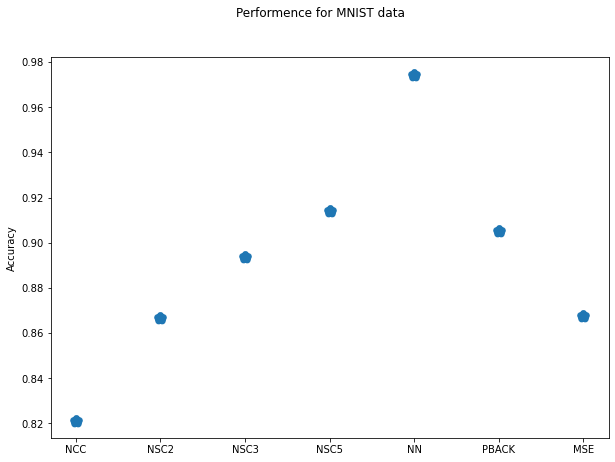

In [64]:
# Performance visualisation for MNIST data

names = ['NCC','NSC2','NSC3','NSC5','NN','PBACK','MSE']
values_mnist = [score_ncc_mnist,score_nsc_2_mnist,score_nsc_3_mnist,score_nsc_5_mnist,score_knnc_mnist,score_pback_mnist,
                score_mse_mnist]

plt.figure(figsize=(10, 7))
plt.scatter(names, values_mnist, marker='*', linewidths = 7.0)
plt.ylabel('Accuracy')
plt.suptitle('Performence for MNIST data')
plt.show()

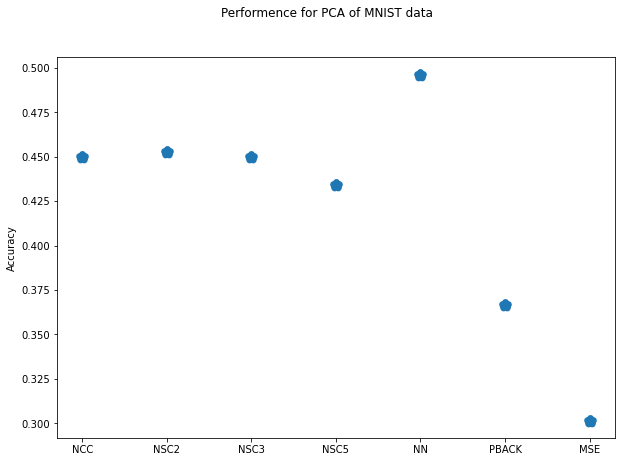

In [69]:
# Performance visualisation for PCA of MNIST data

names = ['NCC','NSC2','NSC3','NSC5','NN','PBACK','MSE']
values_mnist_pca = [score_ncc_mnist_pca,score_nsc_2_mnist_pca,score_nsc_3_mnist_pca,score_nsc_5_mnist_pca,score_knnc_mnist_pca,
                score_pback_mnist_pca,score_mse_mnist_pca]

plt.figure(figsize=(10, 7))
plt.scatter(names, values_mnist_pca, marker='*', linewidths = 7.0)
plt.ylabel('Accuracy')
plt.suptitle('Performence for PCA of MNIST data')
plt.show()

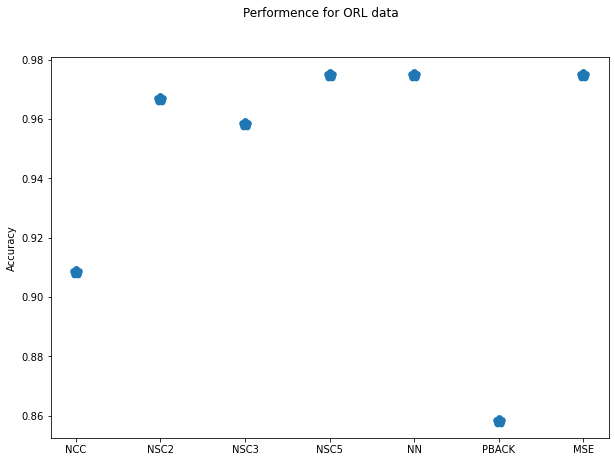

In [68]:
# Performance visualisation for ORL data

names = ['NCC','NSC2','NSC3','NSC5','NN','PBACK','MSE']
values_orl = [score_ncc_orl,score_nsc_2_orl,score_nsc_3_orl,score_nsc_5_orl,score_knnc_orl,score_pback_orl,
                score_mse_orl]

plt.figure(figsize=(10, 7))
plt.scatter(names, values_orl, marker='*', linewidths = 7.0)
plt.ylabel('Accuracy')
plt.suptitle('Performence for ORL data')
plt.show()

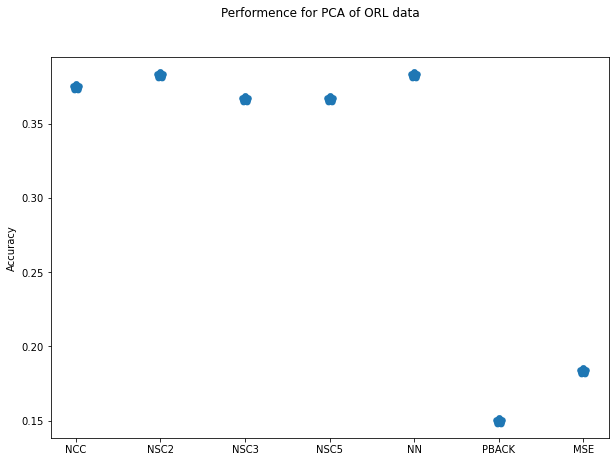

In [70]:
# Performance visualisation for PCA of ORL data

names = ['NCC','NSC2','NSC3','NSC5','NN','PBACK','MSE']
values_orl_pca = [score_ncc_orl_pca,score_nsc_2_orl_pca,score_nsc_3_orl_pca,score_nsc_5_orl_pca,score_knnc_orl_pca,
                score_pback_orl_pca,score_mse_orl_pca]

plt.figure(figsize=(10, 7))
plt.scatter(names, values_orl_pca, marker='*', linewidths = 7.0)
plt.ylabel('Accuracy')
plt.suptitle('Performence for PCA of ORL data')
plt.show()

Text(0.5, 0.98, 'PCA for MNIST data')

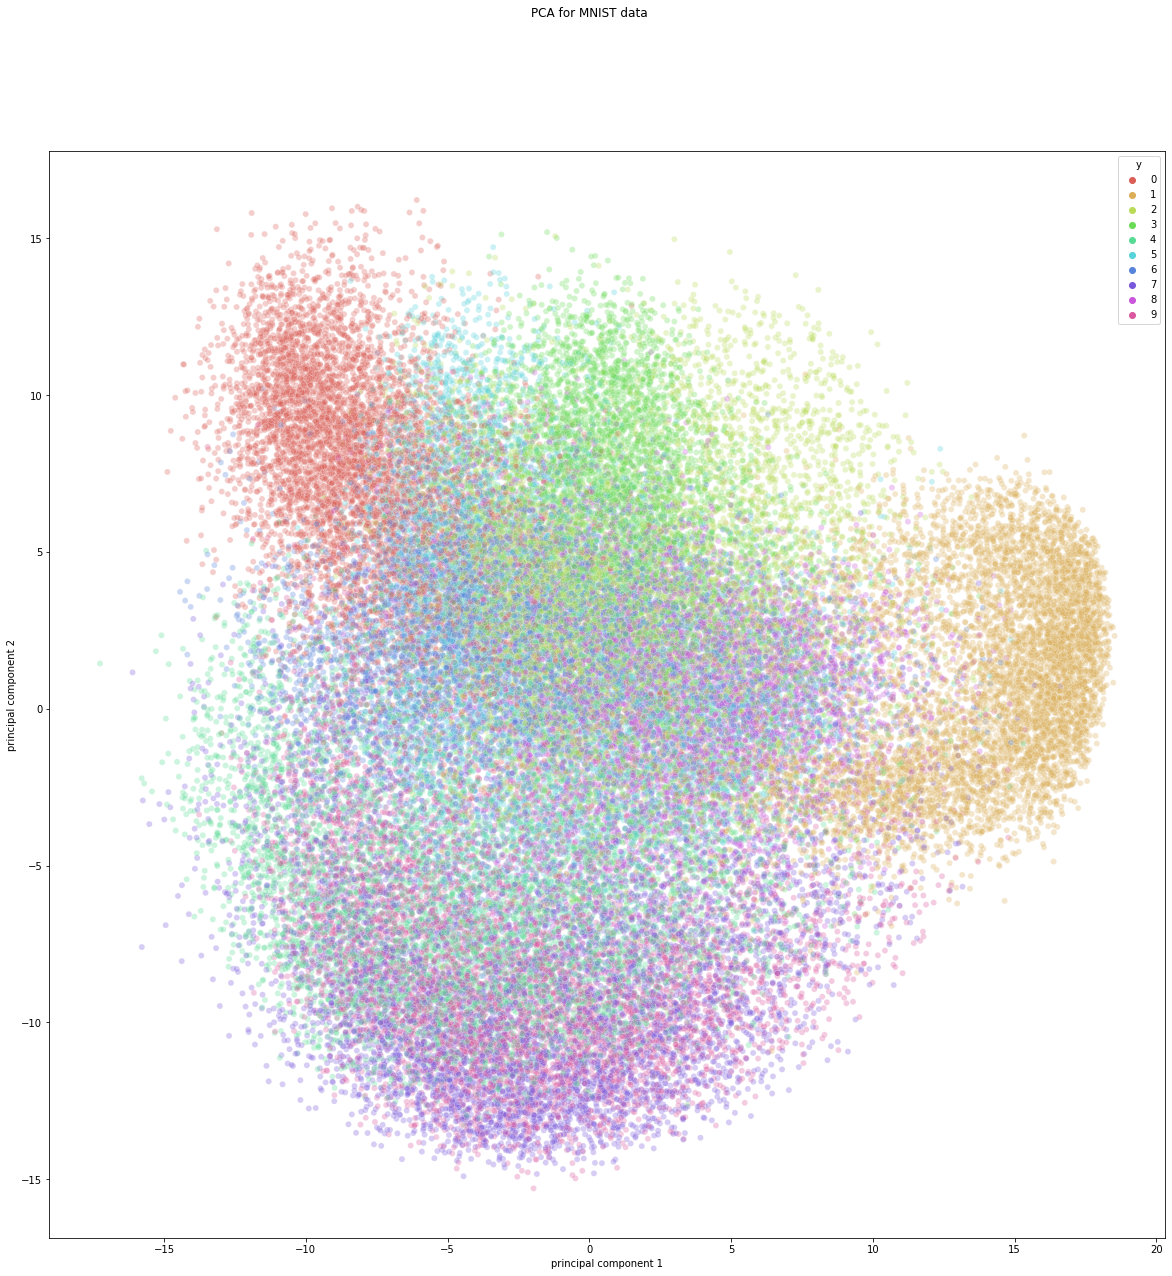

In [186]:
# Visualisation of PCA for MNIST data
principal_mnist = pd.DataFrame(data = pca_train_mnist.transpose(), columns = ['principal component 1', 'principal component 2'])
principal_mnist['y'] = y_train_mnist

plt.figure(figsize=(20,20))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_mnist,
    legend="full",
    alpha=0.3
)
plt.suptitle('PCA for MNIST data')

Text(0.5, 0.98, 'PCA for ORL data')

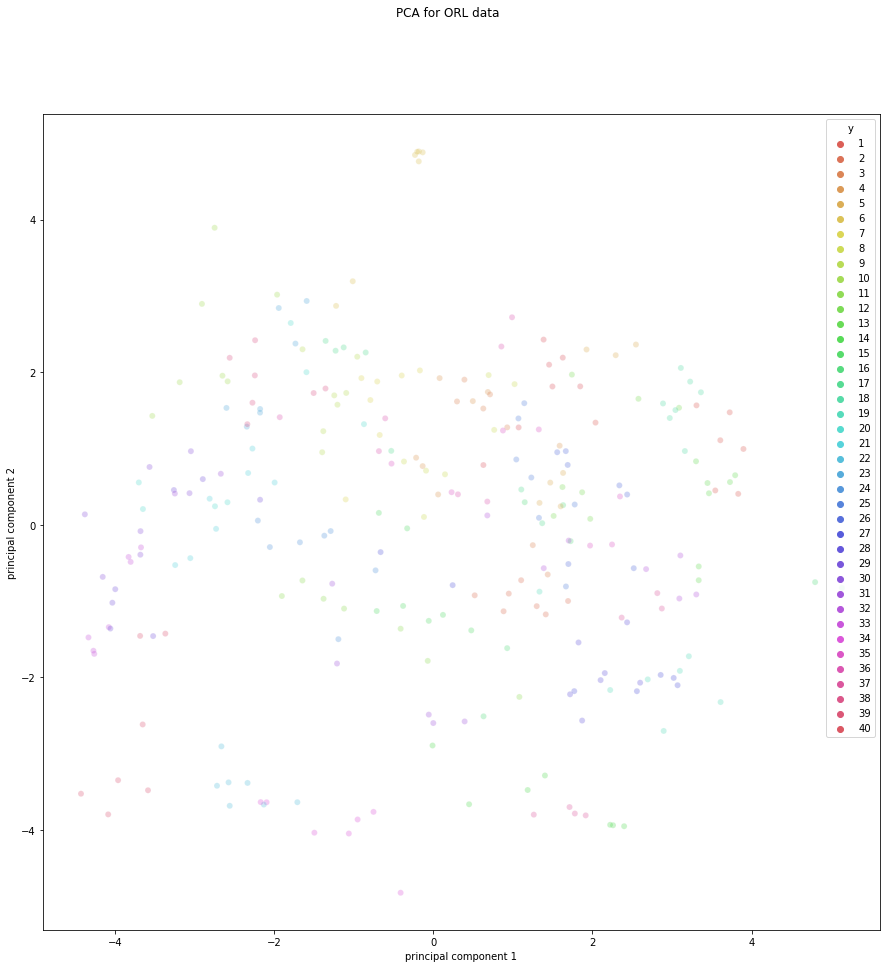

In [187]:
# Visualisation of PCA for ORL data
principal_orl = pd.DataFrame(data = pca_train_orl, columns = ['principal component 1', 'principal component 2'])
principal_orl['y'] = y_train_orl

plt.figure(figsize=(15,15))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 40),
    data=principal_orl,
    legend="full",
    alpha=0.3
)
plt.suptitle('PCA for ORL data')

Text(0.5, 0.98, 'T-distributed stochastic neighbor embedding for MNIST data')

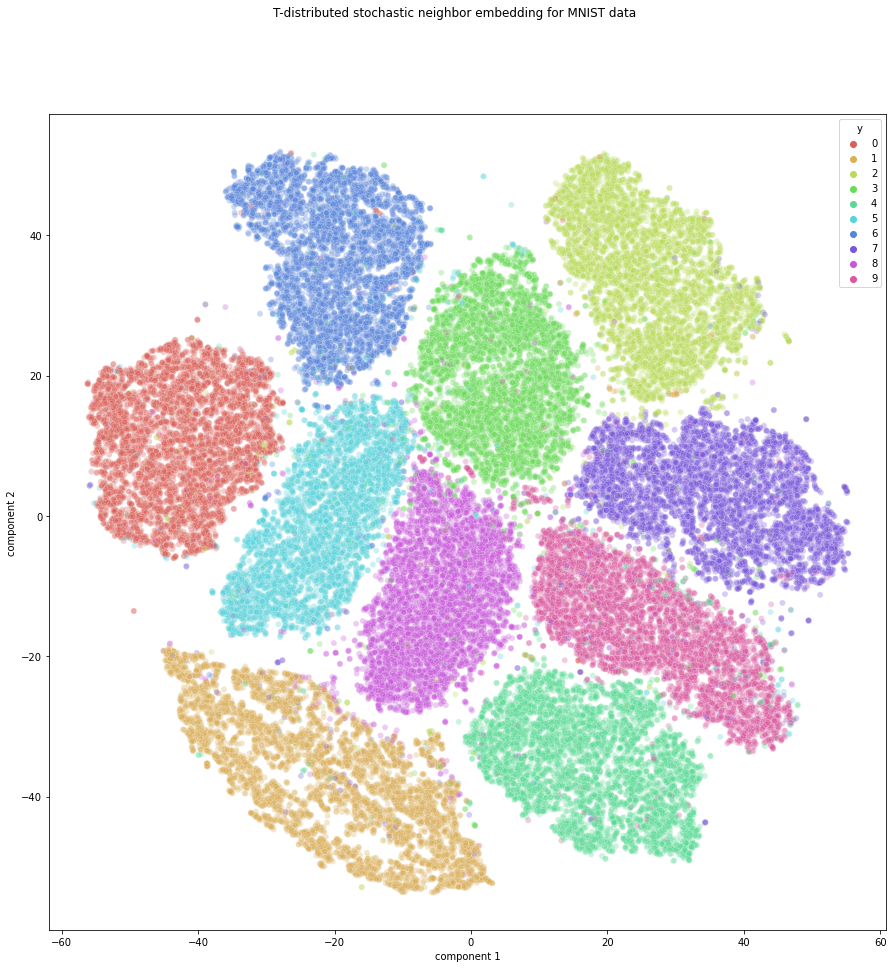

In [189]:
# Visualisation of T-distributed stochastic neighbor embedding for MNIST data
time_start = time.time()
X_train_mnist_tsne = TSNE(n_components=2).fit_transform(X_train_mnist)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

mnist_tense = pd.DataFrame(data = X_train_mnist_tsne, columns = ['component 1', 'component 2'])
mnist_tense['y'] = y_train_mnist

import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="component 1", y="component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_tense,
    legend="full",
    alpha=0.3
)
plt.suptitle('T-distributed stochastic neighbor embedding for MNIST data')

t-SNE done! Time elapsed: 0.8716671466827393 seconds


Text(0.5, 0.98, 'T-distributed stochastic neighbor embedding for ORL data')

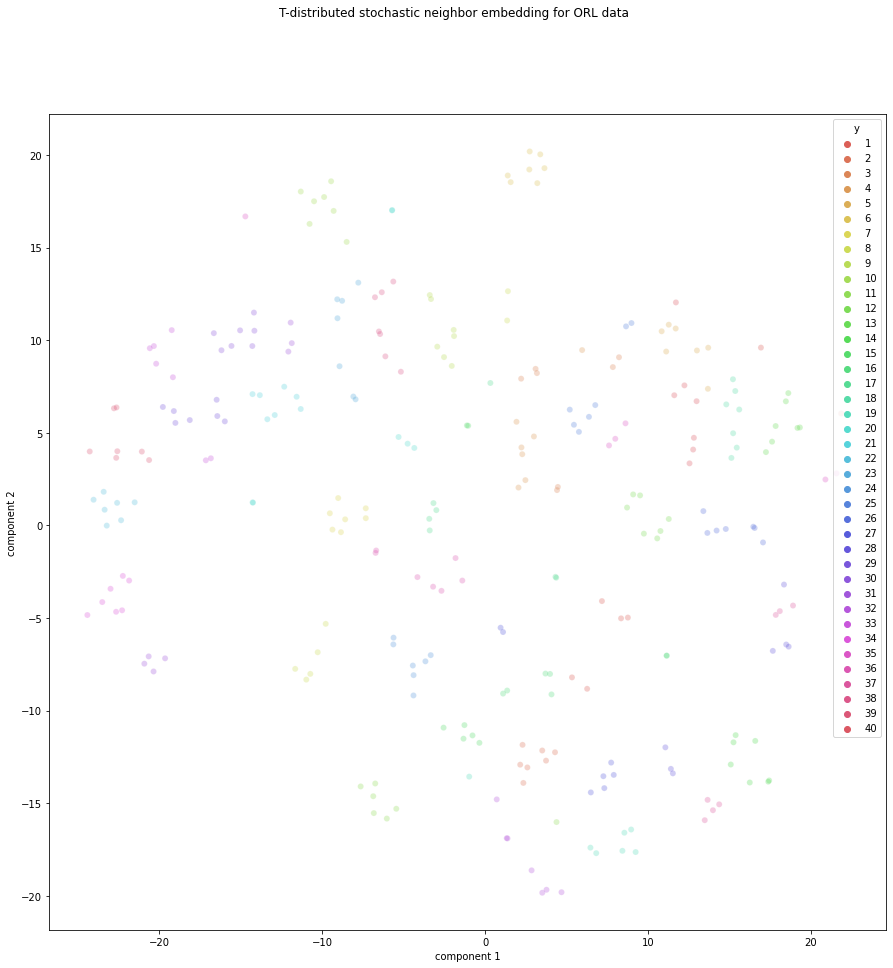

In [190]:
time_start = time.time()
X_train_orl_tsne = TSNE(n_components=2).fit_transform(X_train_orl)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

orl_tnse = pd.DataFrame(data = X_train_tsne, columns = ['component 1', 'component 2'])
orl_tnse['y'] = y_train_orl

plt.figure(figsize=(15,15))
sns.scatterplot(
    x="component 1", y="component 2",
    hue="y",
    palette=sns.color_palette("hls", 40),
    data=orl_tnse,
    legend="full",
    alpha=0.3
)
plt.suptitle('T-distributed stochastic neighbor embedding for ORL data')

In [8]:
#Decision Boundary 
def decision_boundary(classifier, X, y, step_size=0.02, figsize=(10, 8), figure_file_name=None):
    # Start by fitting the classifier
    classifier.fit(X, y)

    # https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
    # Generate mesh data
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step_size),
                           np.arange(x2_min, x2_max, step_size))
    mesh = np.c_[xx1.ravel(), xx2.ravel()]
    
    # Generate predictions based on the mesh data
    Z = classifier.predict(mesh)
    
    # Reshape results to fit the input shape that contour plot accepts.
    Z = Z.reshape(xx1.shape)

    # Predicted labels
    predicted_labels = list(np.unique(Z))
    
    leged_n_col = int(np.ceil(len(predicted_labels) / 20))
    
    # Plot the decision boundary
    fig, ax = plt.subplots(figsize=figsize)
    first_item = predicted_labels[0]-1
    plot = ax.contourf(xx1, xx2, Z, [first_item]+predicted_labels)
    
    # Plot legends
    legends, _ = plot.legend_elements()
    
    ax.legend(legends, predicted_labels, ncol=leged_n_col, loc="upper right", bbox_to_anchor=(1,1))
    ax.axis('off')
    if figure_file_name is not None:
        fig.savefig(figure_file_name, bbox_inches='tight')

In [11]:
classifier_mnist_original = ncc.NearestClassCentroidClassifer(X_train_mnist, y_train_mnist)

TypeError: NearestClassCentroidClassifer() missing 4 required positional arguments: 'y_train', 'y_test', 'pca_train', and 'pca_test'